In [68]:
                           ###    Training our first CNN   ####


    

In [69]:
##   importing all the packages first
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [70]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num of Gpu's Available :", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num of Gpu's Available : 1


In [71]:
###  First before preparing the data... 
      ## organize the data into 
      #->train,
      #->test
      #-> validation 

In [72]:
import os

In [73]:
pwd

'/content/drive/My Drive/Models saving '

In [74]:
cd ..

/content/drive/My Drive


In [75]:
cd ..


/content/drive


In [76]:
pwd

'/content/drive'

In [77]:
ls

'My Drive'/


In [78]:
os.chdir('My Drive')

In [79]:
os.chdir('dogs-vs-cats')

In [80]:
#if os.path.isdir('dogs-vs-cats') is False:   # making directory structure with train,test and validation sets
os.makedirs('train/dog')
os.makedirs('train/cat')
os.makedirs('valid/dog')
os.makedirs('valid/cat')
os.makedirs('test/dog')
os.makedirs('test/cat')

for c in random.sample(glob.glob('cat*'),500):
  shutil.move(c,'train/cat')
for c in random.sample(glob.glob('dog*'),500):
  shutil.move(c,'train/dog')
for c in random.sample(glob.glob('cat*'),100):
  shutil.move(c,'valid/cat')
for c in random.sample(glob.glob('dog*'),100):
  shutil.move(c,'valid/dog')
for c in random.sample(glob.glob('cat*'),50):
  shutil.move(c,'test/cat')
for c in random.sample(glob.glob('dog*'),50):
  shutil.move(c,'test/dog')

FileExistsError: ignored

In [81]:
pwd

'/content/drive/My Drive/dogs-vs-cats'

In [82]:
cd ..

/content/drive/My Drive


In [83]:
pwd

'/content/drive/My Drive'

In [84]:
train_path='/content/drive/My Drive/dogs-vs-cats/train'   ## for simplification of train data location

In [85]:
test_path='/content/drive/My Drive/dogs-vs-cats/test'    ## for simplification of test data location

In [86]:
valid_path='/content/drive/My Drive/dogs-vs-cats/valid'     ## ## for simplification of validation data location

In [87]:
# Now we are sending data in the format of  how vgg16 accepts data before passing to neural n/w

## and then mentioninf the directry loation in which training dta present and the preprocessing isdone

    #and then the sizes of all the images shoulkd be in a same size(224,224)

train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 1000 images belonging to 2 classes.


In [88]:

## shuffling will not be done here bcos to cross chk the testing results with predicted resultys while using confusion matrix

test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 100 images belonging to 2 classes.


In [89]:
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)

Found 200 images belonging to 2 classes.


In [90]:
assert train_batches.n==1000  ## cross chkng whether the smamples and classes are of same size or not

In [91]:
assert test_batches.n==100

In [92]:
assert valid_batches.n==200

In [93]:
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes ==2

In [94]:
imgs,labels=next(train_batches)  ## tells  the iteration flow for the trained batch 
                                  ## The flow will be mentioned in the below code snippet

In [95]:
###plotting images in grid form  with 1 row and 10 columns (of the data)

def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

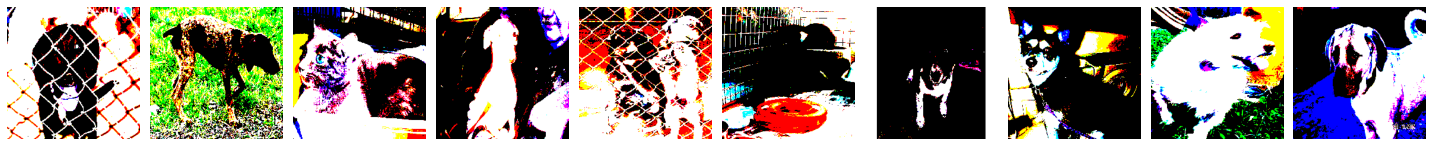

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [96]:
plotImages(imgs)
print(labels)

In [97]:
                    ##   Now train the CNN by specifying the architecture ###

In [98]:
model_cnn=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax'),
])



In [99]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [100]:
 ## if we use binary cross_entrophy we need to use 1 output node instead of 2 and sigmoid actvation func' will be used ### 

model_cnn.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [102]:
model_cnn.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=2)

## we are not mentiong target variable(y) which are train labels bcos image data genrtr by default have the corresponfing lables

Epoch 1/10
100/100 - 300s - loss: 6.9612 - accuracy: 0.6710 - val_loss: 8.6847 - val_accuracy: 0.5650
Epoch 2/10
100/100 - 7s - loss: 3.7925 - accuracy: 0.7670 - val_loss: 5.0575 - val_accuracy: 0.5950
Epoch 3/10
100/100 - 7s - loss: 0.7101 - accuracy: 0.9090 - val_loss: 2.8199 - val_accuracy: 0.6300
Epoch 4/10
100/100 - 7s - loss: 0.1656 - accuracy: 0.9630 - val_loss: 3.9208 - val_accuracy: 0.5850
Epoch 5/10
100/100 - 7s - loss: 0.1248 - accuracy: 0.9630 - val_loss: 3.2757 - val_accuracy: 0.6150
Epoch 6/10
100/100 - 8s - loss: 0.0306 - accuracy: 0.9900 - val_loss: 3.1273 - val_accuracy: 0.6200
Epoch 7/10
100/100 - 7s - loss: 0.0137 - accuracy: 0.9970 - val_loss: 3.1245 - val_accuracy: 0.6350
Epoch 8/10
100/100 - 7s - loss: 9.6003e-04 - accuracy: 1.0000 - val_loss: 3.0457 - val_accuracy: 0.6200
Epoch 9/10
100/100 - 7s - loss: 3.1090e-04 - accuracy: 1.0000 - val_loss: 2.9850 - val_accuracy: 0.6600
Epoch 10/10
100/100 - 7s - loss: 1.3792e-04 - accuracy: 1.0000 - val_loss: 2.9956 - val_ac

In [103]:
## Above model works well but gives only 69 percent accuracy with validation set... 

#so simply we are going to fine tune the model ****(use pre trained model )***

## before finetuning we will see how it performs with the output 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

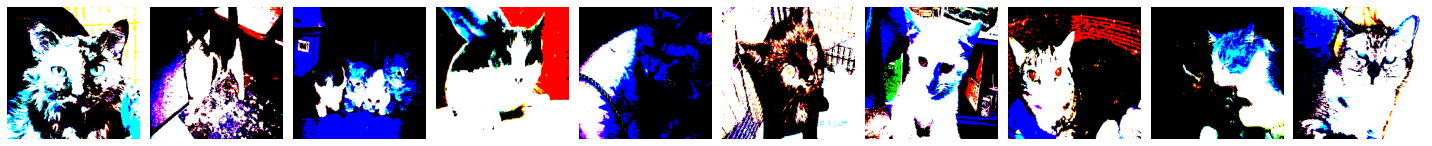

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [104]:
test_imgs,test_labels=next(test_batches)  ## iterates each image in directory one by one
plotImages(test_imgs)
print(test_labels)

In [105]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [106]:
predictions=model_cnn.predict(x=test_batches,verbose=0)  ### Predicting on test batches

In [107]:
predictions   ## they are in form of probabilities so we need to round off them to 1 or 0 which is done in nxt stp ##

array([[9.9999988e-01, 6.1668999e-08],
       [9.9977952e-01, 2.2045180e-04],
       [9.9990392e-01, 9.6088123e-05],
       [1.0000000e+00, 1.5164245e-11],
       [9.9997509e-01, 2.4880497e-05],
       [1.5785201e-11, 1.0000000e+00],
       [2.1679009e-05, 9.9997830e-01],
       [9.9999976e-01, 2.8638667e-07],
       [1.3745283e-03, 9.9862552e-01],
       [9.9432051e-01, 5.6794784e-03],
       [9.9880087e-01, 1.1990954e-03],
       [1.0000000e+00, 7.9264734e-10],
       [1.0000000e+00, 1.6085389e-08],
       [7.7099150e-01, 2.2900850e-01],
       [1.0000000e+00, 2.5954360e-11],
       [9.9632001e-01, 3.6799349e-03],
       [7.8782492e-08, 9.9999988e-01],
       [7.6164895e-01, 2.3835103e-01],
       [1.7458124e-01, 8.2541877e-01],
       [9.8316067e-01, 1.6839372e-02],
       [1.0000000e+00, 5.1366437e-12],
       [8.7450308e-01, 1.2549685e-01],
       [1.6275400e-02, 9.8372459e-01],
       [9.9999964e-01, 3.3436390e-07],
       [1.0000000e+00, 5.8107574e-10],
       [9.9997771e-01, 2.

In [108]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [109]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [110]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[34 16]
 [22 28]]


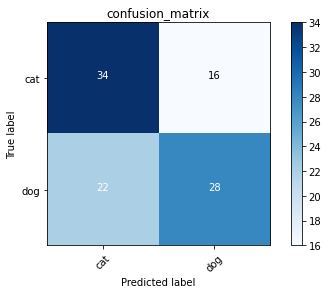

In [111]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='confusion_matrix')

In [112]:
                              #  Building a pretrained model  ##

In [113]:
##preprocessing in keras is done by taking mean value of one single color of all training data 

#       and subtracing it with the redvalue of every sample in the data.

##      so that the data size is reduced

##   when evr new data is passed to vgg16 the data shd be processd in sch a wa that vgg16 is processeed



In [114]:
vgg16_model=tf.keras.applications.vgg16.VGG16()   ## install vgg16 model

553467904/553467096 [==============================] - 5s 0us/step


In [115]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [116]:
##   above summary shows that it can predict 1000 classes

##   But our requirement only has 2 classes

##  so simply we use 2 classes by fine tuning the pretrained model

In [117]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [118]:
###   so we are going to convert original vgg16 model(which is a fucntional model)  to a sequential model

In [119]:

#  we simply took all the layers in vgg16(which is bydefault a fucntional api) 

#    except last layer(1000 classes classifir) and add all the layers to Sequential api


vggmodel=Sequential()
for i in vgg16_model.layers[:-1]:
  vggmodel.add(i)

In [120]:
vggmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [121]:
##    Now before training satage we need to freeze the weights of model_vgg16...
##   bcos it has already learnt the features in the actual pre-training phase   ##


In [122]:
for layer in vggmodel.layers:     ## we freezed the model with trained weights which already captured pattrm of cat and dog
  layer.trainable=False

In [123]:
vggmodel.add(Dense(units=2,activation='softmax'))  ## adding our own last layer which gives 2 outputs

In [124]:
vggmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [125]:
 #   Here above summry shows that we trained our  model only on last dense layer whcih we defined and all the abpve layers are freezed



In [126]:
## Now we will see how to train the model on our own data

In [127]:
                            ###   Training vgg16model on our own data



In [128]:
##  compile the model to work on our own data

vggmodel.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics='accuracy')

In [129]:
##  train the mdoel now with our data

vggmodel.fit(x=train_batches,validation_data=valid_batches,epochs=5,verbose=2)

Epoch 1/5
100/100 - 15s - loss: 0.1859 - accuracy: 0.9400 - val_loss: 0.0882 - val_accuracy: 0.9700
Epoch 2/5
100/100 - 15s - loss: 0.0362 - accuracy: 0.9900 - val_loss: 0.0436 - val_accuracy: 0.9800
Epoch 3/5
100/100 - 15s - loss: 0.0138 - accuracy: 0.9950 - val_loss: 0.0707 - val_accuracy: 0.9750
Epoch 4/5
100/100 - 15s - loss: 0.0039 - accuracy: 0.9980 - val_loss: 0.0848 - val_accuracy: 0.9700
Epoch 5/5
100/100 - 15s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9700


In [130]:
assert vggmodel.history.history.get('accuracy')[-1] > 0.95

In [131]:
                          ##   lets chk how it works with our testing data 

In [132]:
vggpredictions=vggmodel.predict(x=test_batches,verbose=0)

In [145]:
vggpredictions

array([[9.99994755e-01, 5.19566993e-06],
       [9.24684048e-01, 7.53159225e-02],
       [9.96433377e-01, 3.56659922e-03],
       [9.99998808e-01, 1.16343540e-06],
       [9.99997497e-01, 2.47702656e-06],
       [9.99996305e-01, 3.71086821e-06],
       [1.00000000e+00, 4.78498485e-08],
       [9.99999881e-01, 1.53475483e-07],
       [9.99992013e-01, 8.03739385e-06],
       [1.00000000e+00, 1.90284535e-08],
       [1.00000000e+00, 8.15823381e-11],
       [9.99999642e-01, 3.72257176e-07],
       [1.00000000e+00, 2.89858582e-10],
       [9.99999881e-01, 1.24066659e-07],
       [1.00000000e+00, 5.95399925e-08],
       [9.99998689e-01, 1.34037589e-06],
       [1.00000000e+00, 1.60978952e-10],
       [9.99999404e-01, 5.39076950e-07],
       [1.00000000e+00, 7.25746130e-09],
       [1.00000000e+00, 2.07517399e-08],
       [1.00000000e+00, 2.69932449e-12],
       [1.00000000e+00, 8.00829536e-09],
       [9.99936461e-01, 6.35243123e-05],
       [1.00000000e+00, 4.12245654e-10],
       [9.997200

In [133]:
test_batches.classes  ## these are unshuffled to cross chk with the predicitions  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [134]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [135]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[34 16]
 [22 28]]


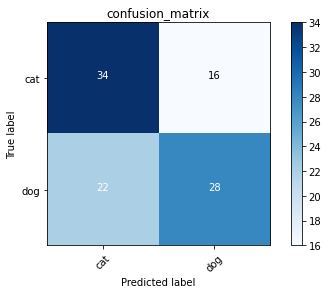

In [136]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='confusion_matrix')

In [137]:
                        ####     WOrking with mobile nets  ##

In [137]:
##  Mobilenet is relatively very smalll  when compared to vgg16 bcos of trainable pareametrs  

## Mobilenet occupues 16 MB of space while 

# vgg16 occupies 500 mb of space on disk

## The tradeoff is vgg16 gives more accuracy than vgg16(slighlty better)



In [138]:
  ##   Lets start using Mobile net which is a pretrained model  ##

  mobilenet=tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step
